In [37]:
#Librerias 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
from datetime import datetime
import pandas as pd
from collections import Counter 

In [38]:
fecha=datetime.now().strftime("%m-%d-%Y_%H'%M'%S")
print(fecha)

01-24-2023_15'29'42


In [39]:
#funcion para abrir el csv
def open_csv(file):
    data=pd.read_csv(file)
    print(type(data))
    return data

In [40]:
#funcion de escritura del csv
def write_csv(df,name):
    fecha=str(datetime.now().strftime("%m-%d-%Y"))
    name=name+"_"+fecha
    name_csv="./"+name+".csv"
    df.to_csv(name_csv,header=True, index=True)   
    print("archivo csv guardado")
    return name

In [41]:
#funcion de escritura del pdf
def write_pdf(df,name):
    pdf_name=write_csv(df,name)
    name_pdf="./"+name_pdf+".pdf"
    plt.suptitle("Gráficas "+pdf_name, fontsize=14, fontweight='bold')
    name_pdf="./"+name+".pdf"   
    plt.savefig(namepdf,dpi=600, bbox_inches='tight')
    print("archivo pdf guardado")

In [42]:
#Cargar base de datos de csv
file="file/delivery_dataset.csv"
dt_report=open_csv(file)
dt_report.info()
dt_report

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   8999 non-null   int64  
 1   Month                  8999 non-null   int64  
 2   DayofMonth             8999 non-null   int64  
 3   DayOfWeek              8999 non-null   int64  
 4   Actual_Shipment_Time   8842 non-null   float64
 5   Planned_Shipment_Time  8999 non-null   int64  
 6   Planned_Delivery_Time  8999 non-null   int64  
 7   Carrier_Name           8999 non-null   object 
 8   Carrier_Num            8999 non-null   int64  
 9   Planned_TimeofTravel   8999 non-null   int64  
 10  Shipment_Delay         8842 non-null   float64
 11  Source                 8999 non-null   object 
 12  Destination            8999 non-null   object 
 13  Distance               8999 non-null   int64  
 14  Delivery_Status   

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2020,1,3,4,2003.0,1955,2225,WN,335,150,8.0,IAD,TPA,810,0.0
1,2020,1,3,4,754.0,735,1000,WN,3231,145,19.0,IAD,TPA,810,1.0
2,2020,1,3,4,628.0,620,750,WN,448,90,8.0,IND,BWI,515,0.0
3,2020,1,3,4,926.0,930,1100,WN,1746,90,-4.0,IND,BWI,515,0.0
4,2020,1,3,4,1829.0,1755,1925,WN,3920,90,34.0,IND,BWI,515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,2020,1,6,7,1928.0,1920,2020,WN,2611,120,8.0,BWI,BNA,588,0.0
8995,2020,1,6,7,927.0,925,1030,WN,127,65,2.0,BWI,BUF,281,0.0
8996,2020,1,6,7,1147.0,1145,1250,WN,903,65,2.0,BWI,BUF,281,0.0
8997,2020,1,6,7,1705.0,1655,1805,WN,1516,70,10.0,BWI,BUF,281,0.0


In [43]:
dt_report.shape

(8999, 15)

In [44]:
dt_report.count()

Year                     8999
Month                    8999
DayofMonth               8999
DayOfWeek                8999
Actual_Shipment_Time     8842
Planned_Shipment_Time    8999
Planned_Delivery_Time    8999
Carrier_Name             8999
Carrier_Num              8999
Planned_TimeofTravel     8999
Shipment_Delay           8842
Source                   8999
Destination              8999
Distance                 8999
Delivery_Status          8842
dtype: int64

In [45]:
dt_report.dtypes

Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name              object
Carrier_Num                int64
Planned_TimeofTravel       int64
Shipment_Delay           float64
Source                    object
Destination               object
Distance                   int64
Delivery_Status          float64
dtype: object

In [46]:
dt_report.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

In [47]:
dt_report.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
Actual_Shipment_Time     157
Planned_Shipment_Time      0
Planned_Delivery_Time      0
Carrier_Name               0
Carrier_Num                0
Planned_TimeofTravel       0
Shipment_Delay           157
Source                     0
Destination                0
Distance                   0
Delivery_Status          157
dtype: int64

In [48]:
dt_report=dt_report.dropna() 

In [49]:
dt_report.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Carrier_Num              0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
dtype: int64

In [50]:
dt_report.head() 

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2020,1,3,4,2003.0,1955,2225,WN,335,150,8.0,IAD,TPA,810,0.0
1,2020,1,3,4,754.0,735,1000,WN,3231,145,19.0,IAD,TPA,810,1.0
2,2020,1,3,4,628.0,620,750,WN,448,90,8.0,IND,BWI,515,0.0
3,2020,1,3,4,926.0,930,1100,WN,1746,90,-4.0,IND,BWI,515,0.0
4,2020,1,3,4,1829.0,1755,1925,WN,3920,90,34.0,IND,BWI,515,1.0


C:\Users\PC\AppData\Local\Temp/ipykernel_20848/2888961817.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dt_report.hist(ax=ax)


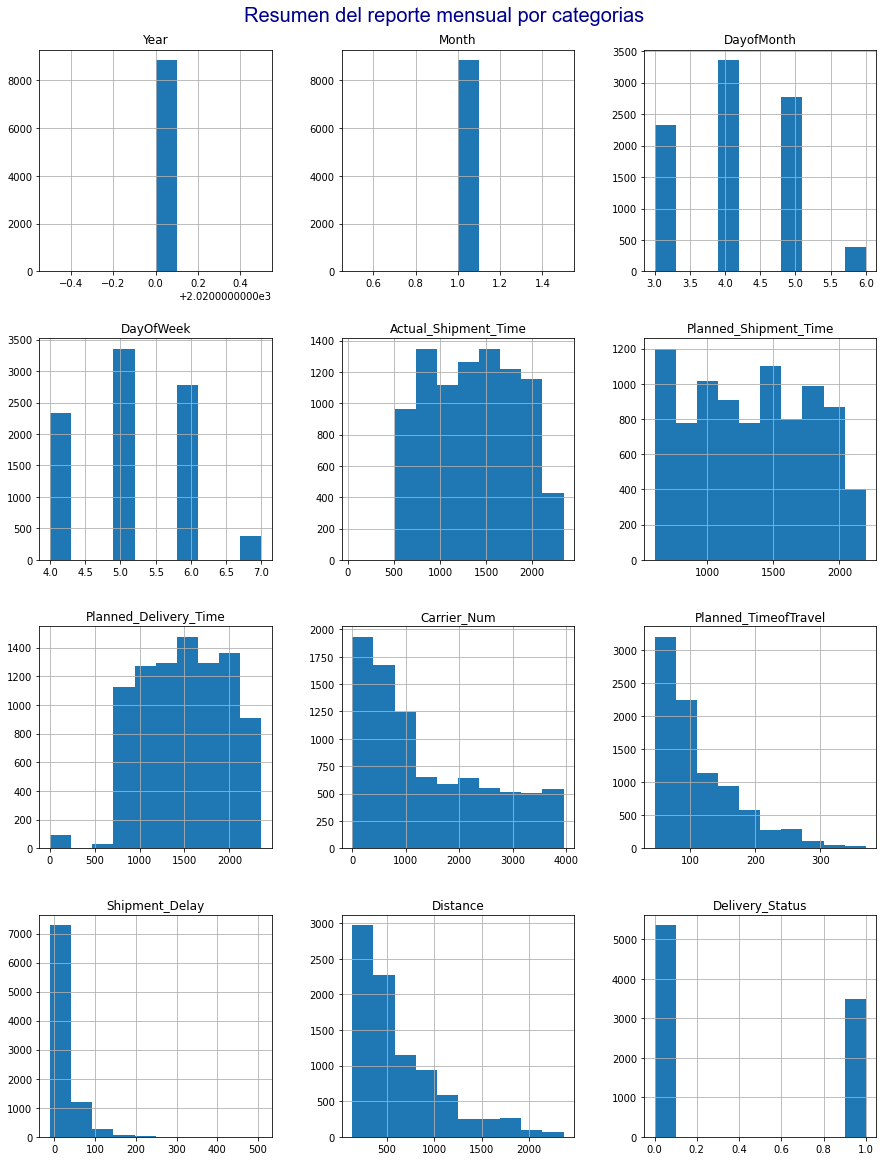

In [86]:
#Plot con resumen del reporte mensual (Categorias entre cantidad de unidades enviadas)
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
dt_report.hist(ax=ax)
plt.suptitle("Resumen del reporte mensual por categorias",position=(0.5, 0.91),
          fontdict={'family': 'Arial', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 25},fontsize=20)
#fig.suptitle(' Set a Single Main Title for All the Subplots ', fontsize=30)
plt.show()

Text(0.5, 0.93, 'Grafica que muestra la cantidad de paquetes enviados en el registro de un mes')

<Figure size 576x864 with 0 Axes>

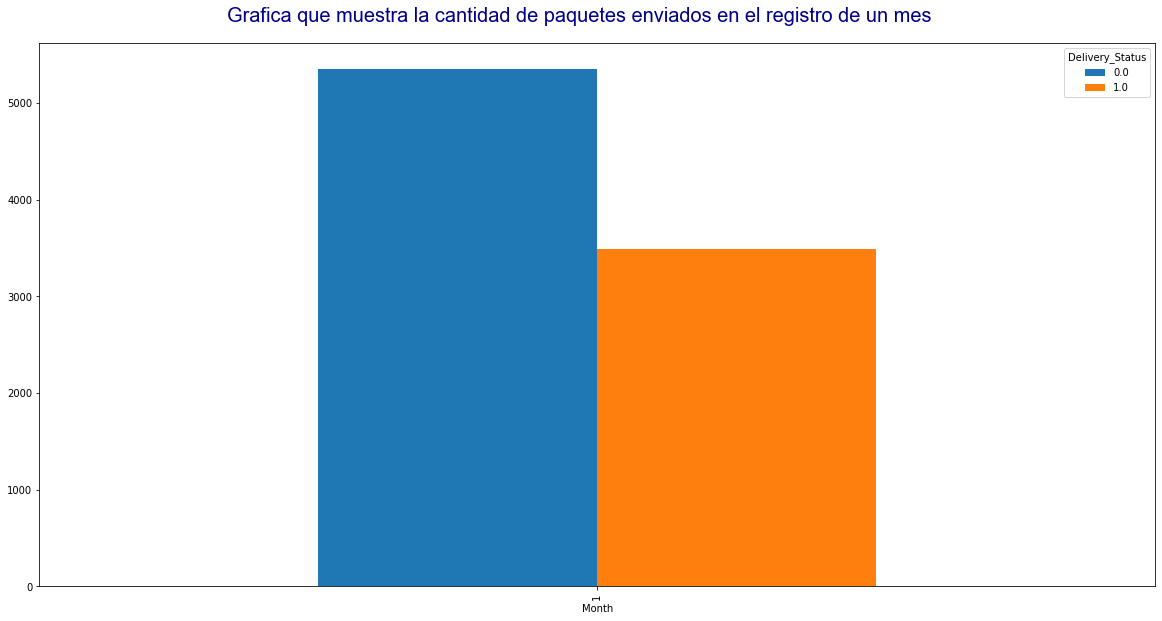

In [117]:
# Grafica que muestra la cantidad de paquetes enviados en el registro de un mes
fig= plt.figure(figsize=(8,12))
pd.crosstab(dt_report['Month'],dt_report['Delivery_Status']).plot(kind='bar',figsize=(20,10))
plt.suptitle("Grafica que muestra la cantidad de paquetes enviados en el registro de un mes",position=(0.5, 0.93),
          fontdict={'family': 'Arial', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 25},fontsize=20)

<AxesSubplot:ylabel='DayOfWeek'>

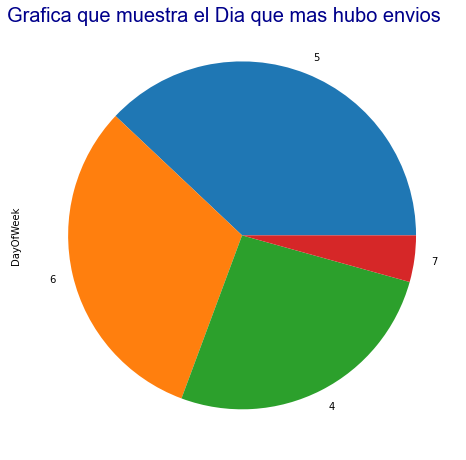

In [123]:
#Grafica que muestra el Dia que mas hubo envios
fig= plt.figure(figsize=(8,8))
fig = dt_report.DayOfWeek.value_counts()
plt.suptitle("Grafica que muestra el Dia que mas hubo envios",position=(0.5, 0.9),
          fontdict={'family': 'Arial', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 25},fontsize=20)
fig.plot.pie()

Text(0.5, 0.95, 'Grafica que muestra el Dia que mas hubo envios')

<Figure size 1080x720 with 0 Axes>

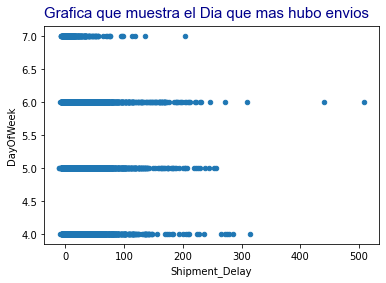

In [121]:
#Grafica que muestra el Dia que mas hubo retraso de entregas de paquetes
fig= plt.figure(figsize=(15,10))
dt_report.plot.scatter(y="DayOfWeek", x="Shipment_Delay")
plt.suptitle("Grafica que muestra el Dia que mas hubo envios",position=(0.5, 0.95),
          fontdict={'family': 'Arial', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 25},fontsize=15)

Text(0.5, 1.0, 'Grafica para Destination')

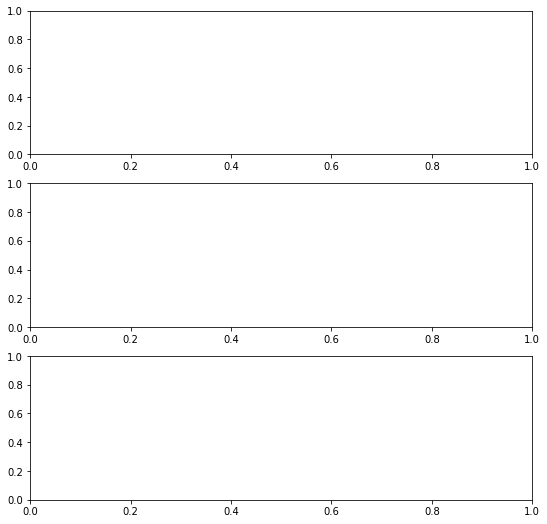

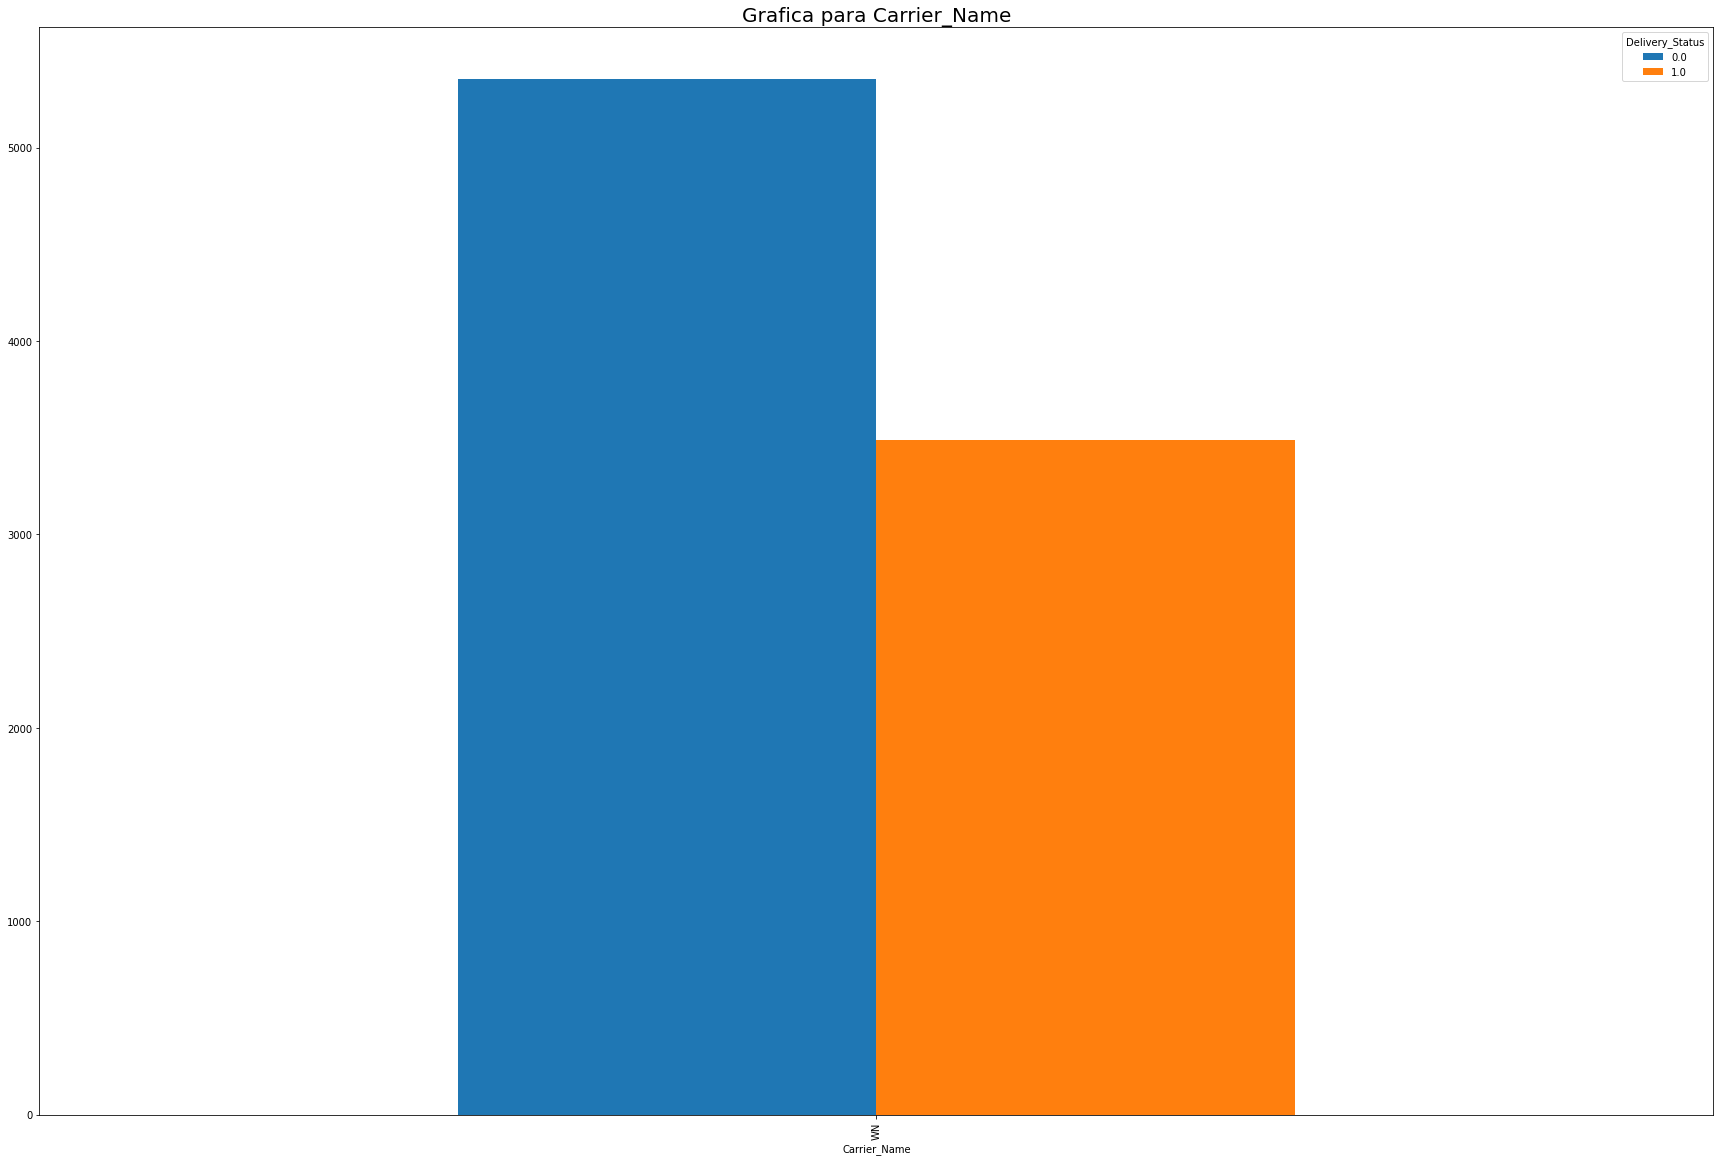

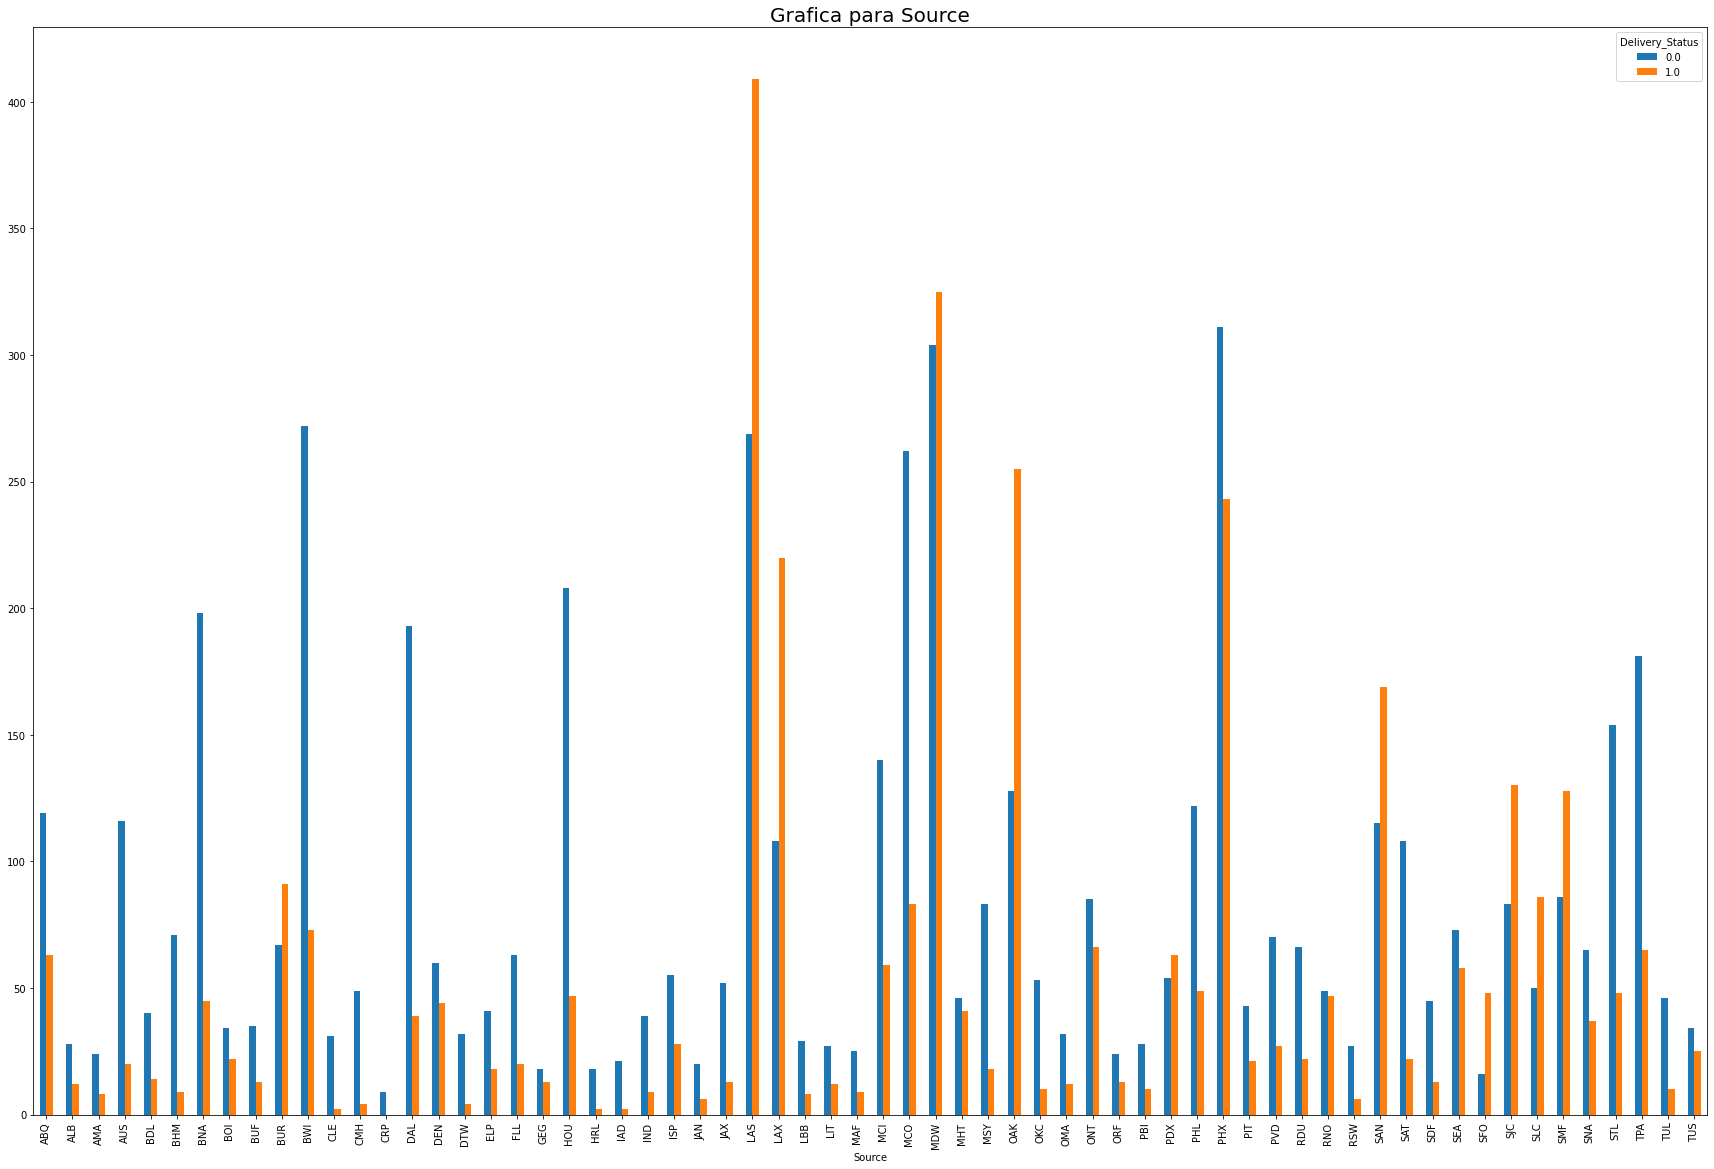

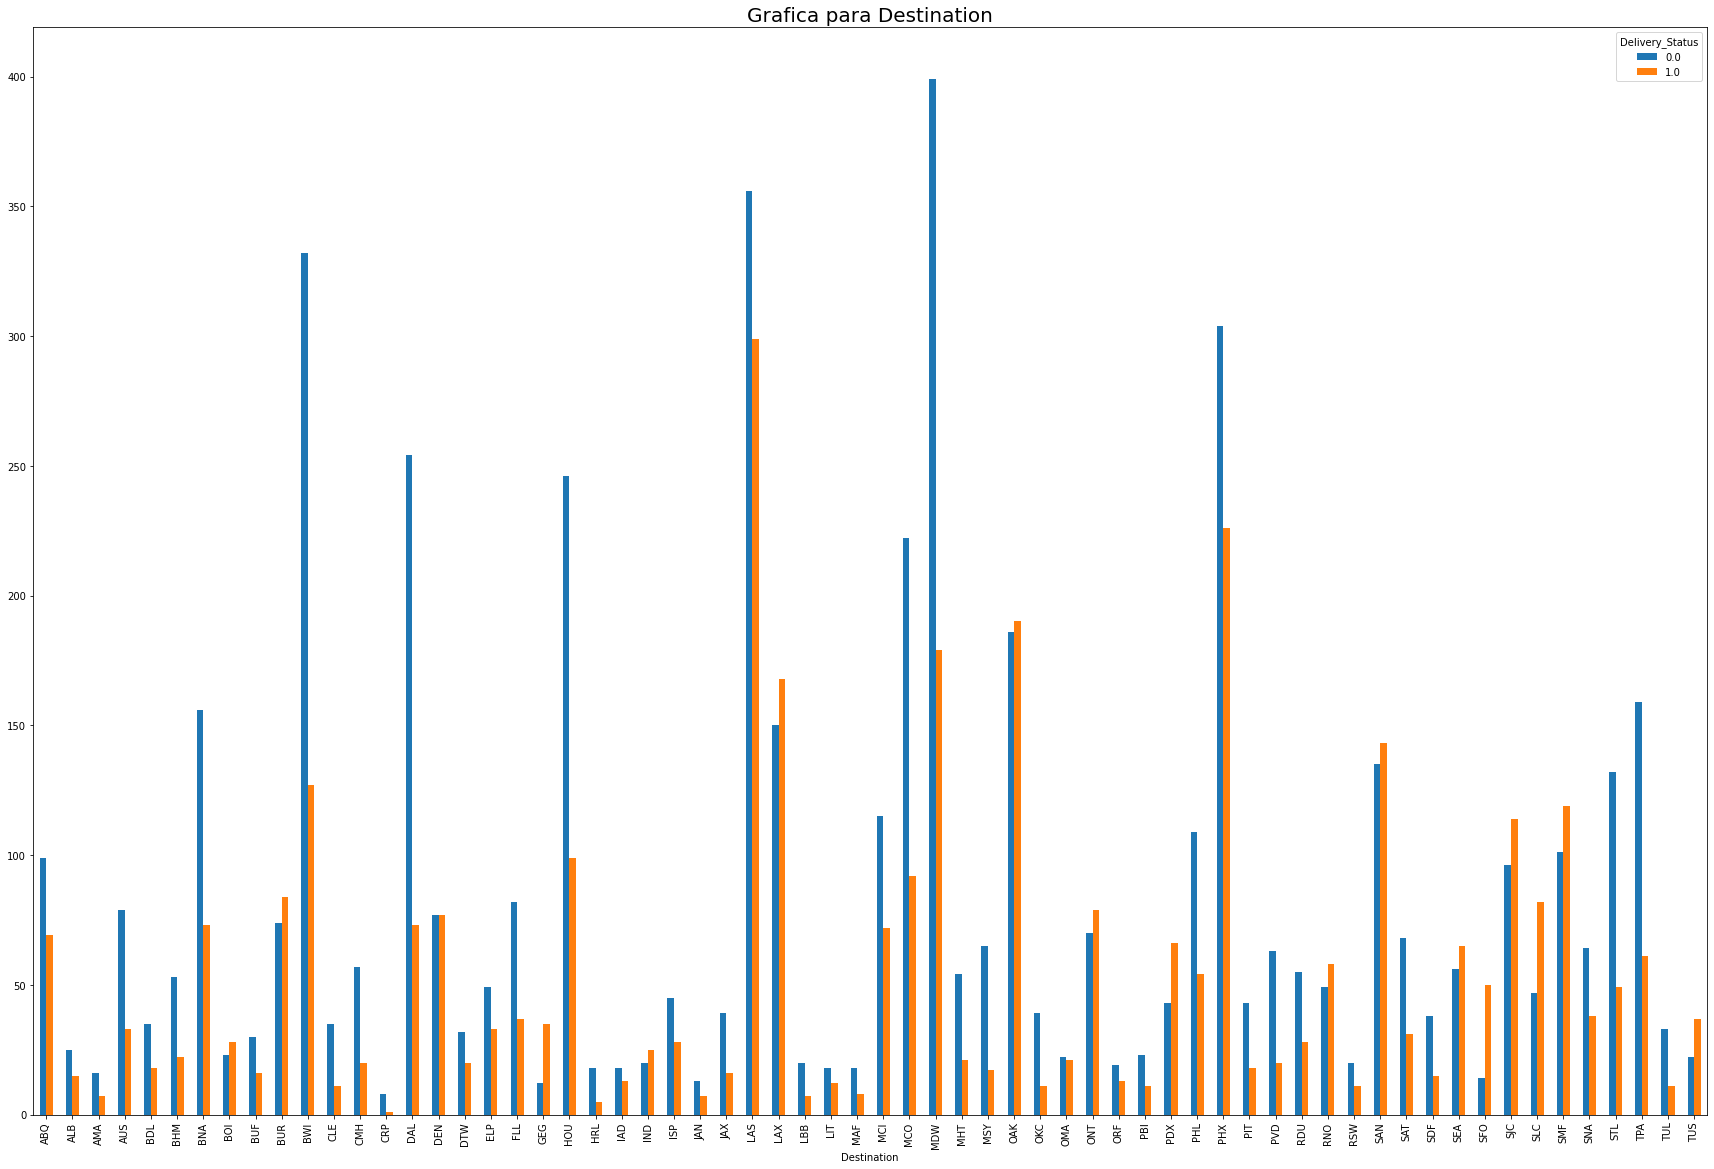

In [149]:
#Graficas de Carrier_Name, Source y Destination segun el estado de envio
fig= plt.figure(figsize=(9,9))
fig.add_subplot(311)
dt_feature1=pd.crosstab(dt_report['Carrier_Name'],dt_report['Delivery_Status']).plot(kind='bar',figsize=(30,20))
plt.title("Grafica para Carrier_Name",fontsize=20)
fig.add_subplot(312)
dt_feature2=pd.crosstab(dt_report['Source'],dt_report['Delivery_Status']).plot(kind='bar',figsize=(30,20))
plt.title("Grafica para Source",fontsize=20)
fig.add_subplot(313)
dt_feature3=pd.crosstab(dt_report['Destination'],dt_report['Delivery_Status']).plot(kind='bar',figsize=(30,20))
plt.title("Grafica para Destination",fontsize=20)
